In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
hotels = pd.read_excel("../Data/HotelCustomersDataset.xlsx")

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64[ns]")

In [4]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [6]:
hotels.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    83590 non-null  int64         
 1   Nationality           83590 non-null  object        
 2   Age                   79811 non-null  float64       
 3   DaysSinceCreation     83590 non-null  int64         
 4   AverageLeadTime       83590 non-null  int64         
 5   LodgingRevenue        83590 non-null  float64       
 6   OtherRevenue          83590 non-null  float64       
 7   BookingsCanceled      83590 non-null  int64         
 8   BookingsNoShowed      83590 non-null  int64         
 9   BookingsCheckedIn     83590 non-null  int64         
 10  PersonsNights         83590 non-null  int64         
 11  RoomNights            83590 non-null  int64         
 12  DaysSinceLastStay     83590 non-null  int64         
 13  DaysSinceFirstSt

In [7]:
hotels.describe().round()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
count,83590.0,79811.0,83590.0,83590.0,83590.0,83590.0,83590.0,83590.0,83590.0,83590.0,...,83590.0,83590.0,83590.0,83590.0,83590.0,83590.0,83590.0,83590.0,83590.0,83590
mean,41796.0,45.0,454.0,66.0,299.0,68.0,0.0,0.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-10-03 08:37:06.065318656
min,1.0,-11.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-01-01 00:00:00
25%,20898.0,34.0,177.0,0.0,59.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-01-07 00:00:00
50%,41796.0,46.0,397.0,29.0,234.0,38.0,0.0,0.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-11-29 00:00:00
75%,62693.0,57.0,723.0,103.0,402.0,88.0,0.0,0.0,1.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2018-07-07 00:00:00
max,83590.0,122.0,1095.0,588.0,21781.0,7730.0,9.0,3.0,66.0,116.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2018-12-31 00:00:00
std,24130.0,17.0,313.0,88.0,373.0,114.0,0.0,0.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


# Assignment 1: Plotting DataFrames

* Plot the `LodgingRevenue` and `OtherRevenue` columns in a line chart from the `monthly_revenue` DataFrame created below.  
* Make sure your x-axis is the `date` column.

In [21]:
x = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

y = x.resample("M").sum()

y.head()

C:\Users\mukib\AppData\Local\Temp\ipykernel_12944\665825102.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = x.resample("M").sum()


,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


Text(0.5, 1.0, 'All types of revenue')

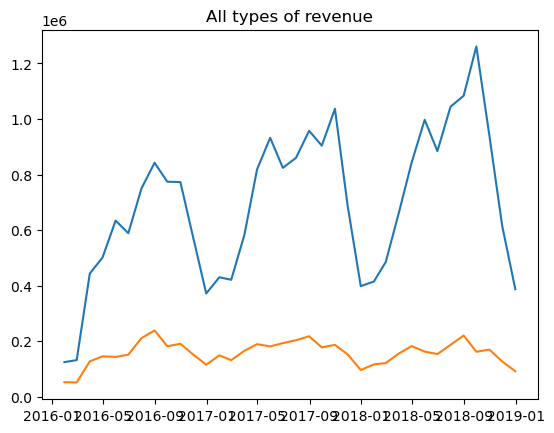

In [22]:
fig, ax = plt.subplots()
ax.plot(y.index, y["LodgingRevenue"])
ax.plot(y.index, y["OtherRevenue"])
ax.set_title("All types of revenue")

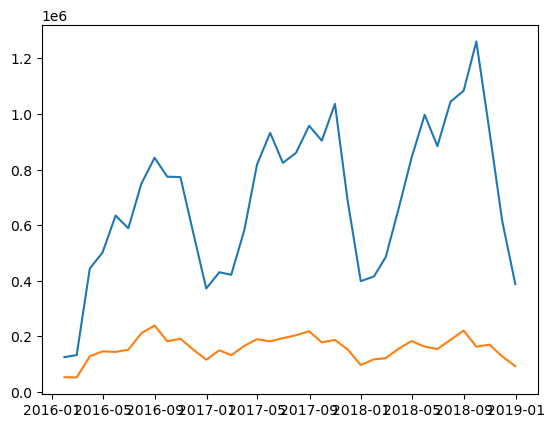

In [24]:
fig, ax = plt.subplots()

ax.plot(y)


In [25]:
m= (hotels
    .groupby("date")
    .agg({"BookingsCanceled" : "sum", "BookingsNoShowed" : "sum"})
)

n = m.resample("M").sum()

n.head(10)

C:\Users\mukib\AppData\Local\Temp\ipykernel_12944\1641497362.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  n = m.resample("M").sum()


,BookingsCanceled,BookingsNoShowed
date,,
2016-01-31,5,3
2016-02-29,1,2
2016-03-31,9,3
2016-04-30,10,2
2016-05-31,12,4
2016-06-30,4,1
2016-07-31,12,1
2016-08-31,14,3
2016-09-30,1,1


Text(0.5, 1.0, 'Bookings')

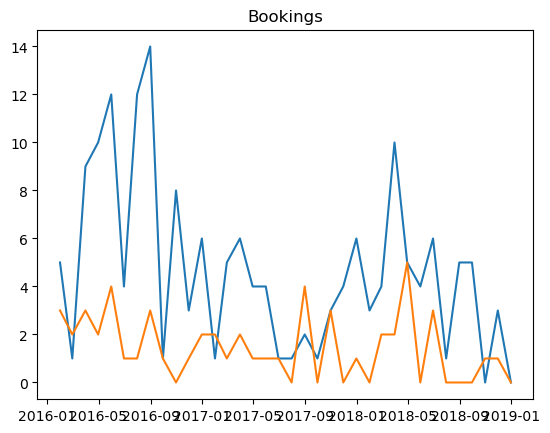

In [27]:
fig, ax = plt.subplots()
ax.plot(n.index, n["BookingsCanceled"])
ax.plot(n.index, n["BookingsNoShowed"])
ax.set_title("Bookings")

ValueError: not enough values to unpack (expected 3, got 2)

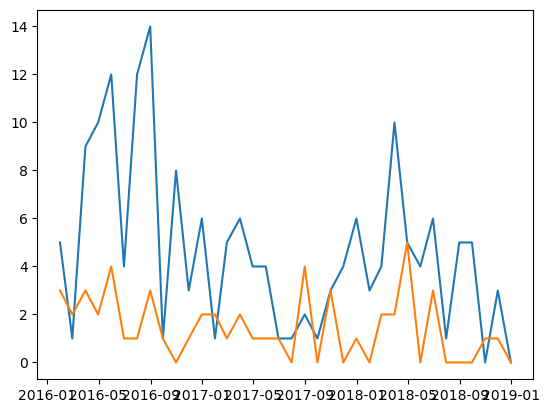

In [29]:
fig, ax.fig,ax = plt.plot(n)

# Assignment 2: Formatted Line Chart

Plot the monthly sum of `LodgingRevenue` and `OtherRevenue`.

Make sure to add titles and a y-axis label, remove the top and right borders, and add a legend.

Consider modifying the font sizes as well.

Thanks!

In [ ]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("M").sum()


# Assignment 2: Dual Axis Line Chart

* Plot the sum of nights booked and the sum of cancellations on a quarterly basis (resample("Q") will help). 

* Plot them in the same chart but different Y-Axes.

* Make sure to add titles and axis labels, remove scientific notation, and add a legend.

* Consider modifying the font sizes as well.

Thanks!

*Note: I accidentally repeated the assignment numbers, but leaving as is to align with video numbering*

In [ ]:
quarterly_bookings.head()

# Assignment 3: Bar Chart

* Create a bar chart of total room nights booked by country. Limit your results to the top 10 countries.

* Then, build a horizontal bar chart of lodging revenue by country for the same countries in your room nights chart.

* As always, make sure to add labels to your chart!

In [ ]:
hotels.head()

In [ ]:
countries = 

# Assignment 4: Advanced Bar Charts

* Build a grouped bar chart of our top 5 countries with LodgingRevenue and OtherRevenue as bars for each.
* Then, build a 100% bar chart stacked bar chart of LodgingRevenue and OtherRevenue. Add a reference line at 80%, which is our baseline. 

Thanks!

In [ ]:
countries = ["FRA", "DEU", "PRT", "GBR", "ESP"]


country_subset.head()

# Assignment 5: Pie Charts

* Build a pie chart of LodgingRevenue by country. Include a slice for our top 5 countries and combine the rest into an 'other' Category.
* Then, convert the pie chart into a donut chart.

In [ ]:
country_rev = 

country_rev

# Assignment 6: Scatterplots & Histograms

* Build a scatterplot comparing average nights stayed by country to average revenue per customer by country.
* Then, build a bubble chart by specifying the size of the bubbles as the average nightly revenue.
* Finally, build a histogram comparing customer age in Germany to the Customer age in france. Make sure to tweak your alpha!

Column Creation Code:

<mark style="background-color: black">
    hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                      revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])</mark>


Thanks!